In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as pl
import sklearn.datasets as ds
%matplotlib inline

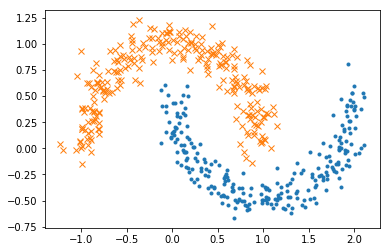

In [4]:
(x, y) = ds.make_moons(500, noise=0.1)
YES = y > 0
NO = np.logical_not(YES)
pl.plot(x[YES,0], x[YES,1], '.', x[NO, 0], x[NO, 1], 'x');

In [101]:
class N():
    pass
n1 = 10
n2 = 10
model = N()
model.x = tf.placeholder(tf.float32, (None, 2))
model.ref = tf.placeholder(tf.float32, (None, 1))
model.l1 = tf.layers.dense(inputs=model.x, units=n1, activation=tf.nn.relu)
model.l2 = tf.layers.dense(inputs=model.l1, units=n2, activation=tf.nn.relu)
model.y = tf.layers.dense(inputs=model.l2, units=1)
model.err = tf.nn.sigmoid_cross_entropy_with_logits(labels=model.ref, logits=model.y)
model.cost = tf.reduce_mean(model.err)

In [102]:
batch_size = 100
rate = 0.01

def batch():
    I = np.random.choice(len(x), batch_size)
    x_sample = x[I,:]
    y_sample = y[I]
    return {model.x: x_sample, model.ref: y_sample.reshape((-1, 1))}

optimizer = tf.train.GradientDescentOptimizer(rate).minimize(model.cost)
s = tf.Session()
s.run(tf.global_variables_initializer())
s.run(model.cost, feed_dict=batch())

0.66856265

In [103]:
feed = batch()

In [116]:
epochs = 1000
for ep in range(epochs):
    cost, _ = s.run([model.cost, optimizer], feed)
    if ep % (epochs // 10) == 0:
        print "[%d]: %.4f" % (ep, cost)
print "Done: %.4f" % cost

[0]: 0.0782
[100]: 0.0742
[200]: 0.0705
[300]: 0.0671
[400]: 0.0638
[500]: 0.0607
[600]: 0.0580
[700]: 0.0555
[800]: 0.0532
[900]: 0.0510
Done: 0.0489


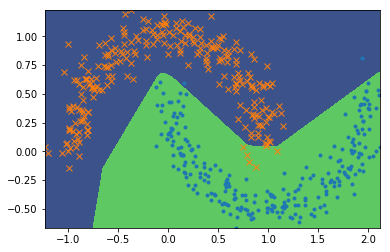

In [117]:
grid_n = 100
xs = np.linspace(np.min(x[:,0]), np.max(x[:,0]), grid_n)
ys = np.linspace(np.min(x[:,1]), np.max(x[:,1]), grid_n)
xx, yy = np.meshgrid(xs, ys)
x0 = xx.reshape(-1)
x1 = yy.reshape(-1)
xinput = np.asarray([x0, x1]).T
output = s.run(tf.sigmoid(model.y), {model.x: xinput})
z = output.reshape((grid_n, grid_n))

pl.contourf(xx, yy, z, levels=[0, 0.5, 1]);
pl.plot(x[YES, 0], x[YES, 1] ,'.', x[NO, 0], x[NO, 1], 'x');